In [45]:
import TMQGP as tm
from numpy import *
import QuarkTM
import numpy as np
from tqdm import notebook as tqdm

In [46]:
import matplotlib
matplotlib.style.use('publication23')

In [123]:
erange = linspace(-5, 5, 201)
qrange = linspace(0, 5, 51)

In [124]:
pt = QuarkTM.Particle(0.5, qrange, erange, stat='f')

In [125]:
ch = QuarkTM.Channel(pt, pt, 0.2, G=30, test_potential=0)

In [126]:
ch.populate_T()

  0%|          | 0/201 [00:00<?, ?it/s]

(0.0, 2.0)

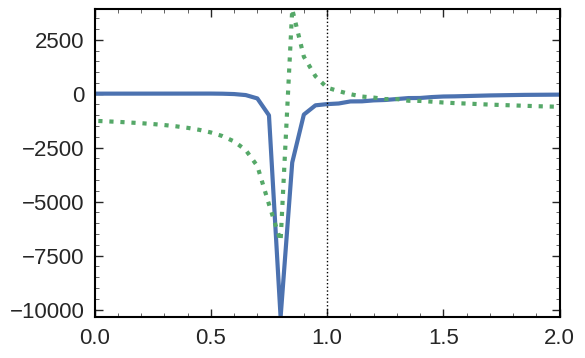

In [217]:
plt.plot(erange, imag(ch.TM[:, 0]))
plt.plot(erange, real(ch.TM[:, 0]), ls=':')
# plt.ylim(-100, 150)
plt.axvline(2*pt.m, lw=1, ls=":", c='black')
plt.xlim(0, 2)

In [167]:
mR = 0.8

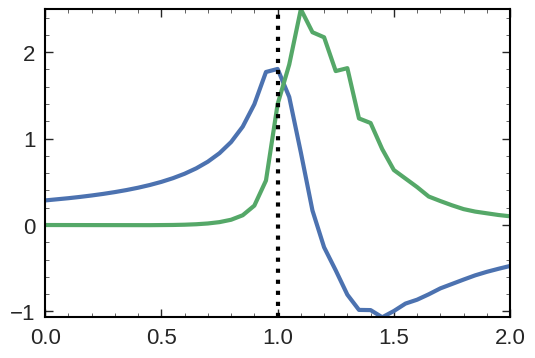

In [168]:
plt.plot(erange, real(ch.X[:, 0]))
plt.plot(erange, imag(ch.X[:, 0]))

plt.xlim(0, 2)
plt.axvline(2*pt.m, c='black', ls=':')
# plt.ylab

In [169]:
emat = array([erange for q in qrange]).transpose()

In [170]:
def LOG(x):
    res = log(x)
    res[real(x) < 0] += pi*1j
    return res

In [171]:
argmat = 1 - (ch.X)#/ (emat**2 - 0.7**2)

In [175]:
argmat_fake = 1 - (1.5 + 0.01j)/ (emat**2 - mR**2)

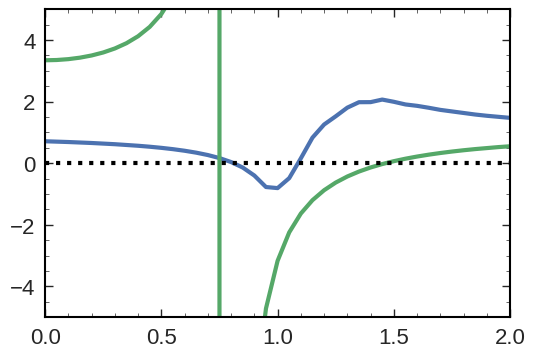

In [176]:
plt.plot(erange, real(argmat[:, 0]))
plt.plot(erange, real(argmat_fake[:, 0]))
plt.xlim(0, 2)
plt.ylim(-5, 5)

plt.axhline(0, ls=':', c='black')

In [181]:
logmat = -log(argmat)
logmat_fake = -(log(argmat_fake))
# logmat[logmat < 0] += pi

Another form of the answer

In [182]:
arg2 = (emat**2 - mR**2) / (emat**2 - mR**2 - (ch.X))
logmat2 = imag(log(arg2))
# logmat2[logmat2 < 0] += pi


In [183]:
Vmat = array([ch.v(qrange)**2 for e in erange])

(0.0, 2.0)

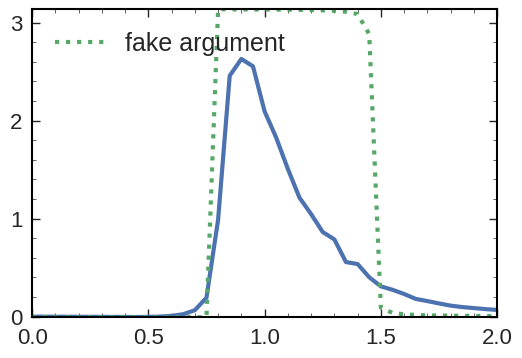

In [185]:
plt.plot(erange, imag(logmat[:, 0]))
# plt.plot(erange, logmat2[:, 0], label='argument of ln')
plt.plot(erange, imag(logmat_fake[:, 0]), ls=':', label='fake argument')
# plt.plot(erange, real(logmat))

plt.legend()

# plt.ylim(0, 5)

plt.xlim(0, 2)

/tmp/ipykernel_79758/770063931.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(erange, imag(logmat[:, -1]) * (1/(exp(erange/0.2) - 1)), label='actual')
/tmp/ipykernel_79758/770063931.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(erange, logmat_fake[:, -1] * (1/(exp(erange/0.2) - 1)), ls=':', label='fake')


(0.0, 1.0)

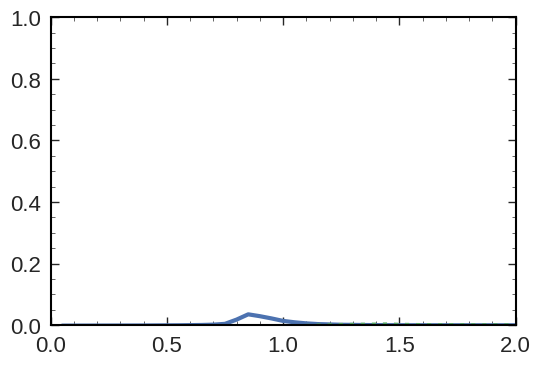

In [186]:
plt.plot(erange, imag(logmat[:, -1]) * (1/(exp(erange/0.2) - 1)), label='actual')
plt.plot(erange, logmat_fake[:, -1] * (1/(exp(erange/0.2) - 1)), ls=':', label='fake')

plt.xlim(0, 2)
plt.ylim(0, 1)

(-1.0, 1.0)

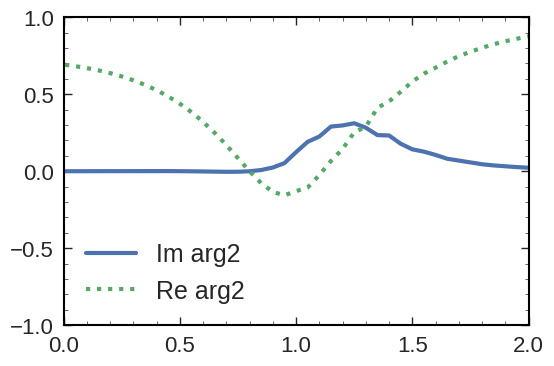

In [187]:
plt.plot(erange, imag(arg2[:, 0]), label='Im arg2')
plt.plot(erange, real(arg2[:, 0]), ls=':', label='Re arg2')
plt.xlim(0, 2)

plt.legend()
plt.ylim(-1, 1)

Try to integrate with $G_2$

In [212]:
iImLT = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(logmat*Vmat/ch.X)))
iReLT = tm.Interpolator2D(qrange, erange, ascontiguousarray(real(logmat*Vmat/ch.X)))

In [213]:
iImLT_fake = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(logmat_fake*Vmat/ch.X)))
iReLT_fake = tm.Interpolator2D(qrange, erange, ascontiguousarray(real(logmat_fake*Vmat/ch.X)))

In [214]:
integrand = array([tm.OmS_B_qfirst_q_int(e, 0.2, ch.iImG2, ch.iReG2, iImLT, iReLT) for e in erange])
integrand_fake = array([tm.OmS_B_qfirst_q_int(e, 0.2, 
            ch.iImG2, ch.iReG2, iImLT_fake, iReLT_fake) for e in erange])


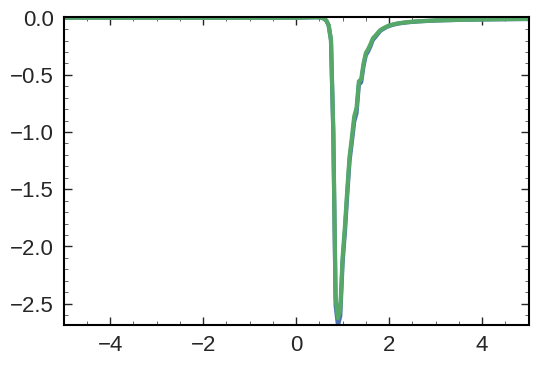

In [215]:
plt.plot(erange, integrand)
# plt.plot(erange, integrand_fake)
plt.plot(erange, -imag(logmat[:, 0]))

Try to integrate with $G_1$

In [144]:
T = 0.2

In [145]:
LS = array([[tm.sigma_ff(e, q, T, iImLT, pt.R) for e in erange] for q in tqdm.tqdm(qrange)])

LS = LS.transpose()

iImLS = tm.Interpolator2D(qrange, erange, ascontiguousarray(LS))

ReST = []

for res in tqdm.tqdm(LS.transpose()):
    iImSigma = tm.Interpolator(erange, np.ascontiguousarray(res), 'cubic')
    ReSigma = [tm.ReSigmaKK(e, iImSigma) for e in erange]
    ReST += [ReSigma]

ReLS = np.array(ReST).transpose()

iReLS = tm.Interpolator2D(qrange, erange, ascontiguousarray(ReLS))

  0%|          | 0/51 [00:00<?, ?it/s]

In [196]:
LS_fake = array([[tm.sigma_ff(e, q, T, iImLT_fake, pt.R) for e in erange] for q in tqdm.tqdm(qrange)])

LS_fake = LS_fake.transpose()

iImLS_fake = tm.Interpolator2D(qrange, erange, ascontiguousarray(LS_fake))

ReST_fake = []

for res in tqdm.tqdm(LS_fake.transpose()):
    iImSigma = tm.Interpolator(erange, np.ascontiguousarray(res), 'cubic')
    ReSigma = [tm.ReSigmaKK(e, iImSigma) for e in erange]
    ReST_fake += [ReSigma]

ReLS_fake = np.array(ReST_fake).transpose()

iReLS_fake = tm.Interpolator2D(qrange, erange, ascontiguousarray(ReLS_fake))

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

In [218]:
ch.populate_S()

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

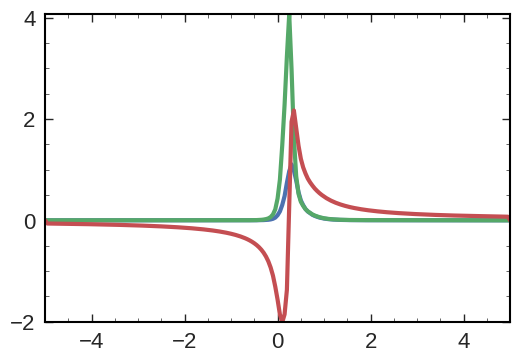

In [222]:
plt.plot(erange, LS[:, 0])
plt.plot(erange, -ch.ImS[:, 0])
plt.plot(erange, ch.ReS[:, 0])
# plt.plot(erange, ReLS[:, 0])

# plt.plot(erange, LS_fake[:, 0])
# plt.plot(erange, ReLS_fake[:, 0])

In [200]:
integrand = array([tm.OmS_B_om_int(q, T, pt.iImG, pt.iReG, iImLS, iReLS)
                  for q in qrange])

integrand_fake = array([tm.OmS_B_om_int(q, T, pt.iImG, pt.iReG, iImLS_fake, iReLS_fake)
                  for q in qrange])

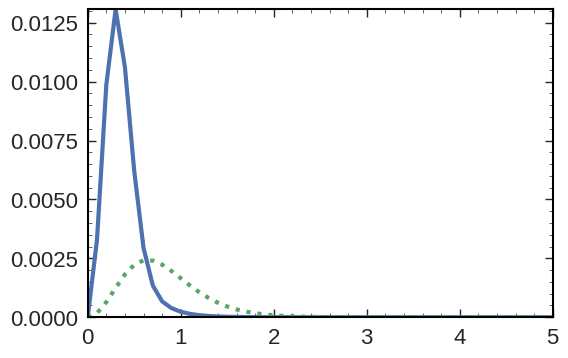

In [211]:
plt.plot(qrange, -qrange**2*integrand)
# plt.plot(qrange, -integrand_fake)
plt.plot(qrange, qrange**2*log(1 + exp(-sqrt(mR**2 + qrange**2)/T)), ls=':')